# Tweet sentiment analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

## Get dataframe from csv file

In [4]:
# Read CSV file
tweets_today = pd.read_csv(r"..\datasets\raw_data\tweets{}.csv".format(datetime.date.today()))
#tweets_today = pd.read_csv(r"..\datasets\tweets2019-09-24.csv")
tweets_today = tweets_today.head(5000)
# Gets tweet texts
tweets_today_text = tweets_today["tweet"]

## Data cleaning

In [5]:
# Preprocessing of tweet texts
def format_tweet(tweet):
    processed_tweet=""
    for word in tweet.full_text.split():
        # Removing URL from tweet
        processed_word = re.sub(r'([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', word)
        
        # Remove all the special characters
        #processed_word = re.sub(r'\W', '', processed_word)
        # remove all single characters
        processed_word = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_word)
        # Remove single characters from the start
        processed_word = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_word) 
        # Substituting multiple spaces with single space
        processed_word = re.sub(r'\s+', '', processed_word, flags=re.I)
        # Removing prefixed 'b'
        processed_word = re.sub(r'^b\s+', ' ', processed_word)
        # Removing &amp
        processed_word = re.sub(r'&amp', '&', processed_word)
        # Converting to Lowercase
        processed_word = processed_word.lower()
        processed_tweet= processed_tweet+" "+processed_word
        return processed_tweet
            
    else:
        return
    
    tweets_today_text = [format_tweet(tweet) for tweet in tweets_today_text]
    tweets_today_text = list(filter(None, tweets_today_text))
    


## Labeling tweets with NLTK vader

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ViMs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
sid = SentimentIntensityAnalyzer()

for tweet in tweets_today_text[:5]:
    print("{0}: \n{1}\n\n".format(tweet, sid.polarity_scores(tweet)))

@PrettyBoyMweza hamba global warming! hayi lantsoooo: 
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2244}


@cooely5281 Climate Change is real hoax, it is a way to control people's lifestyles &amp; money. Paris Accord was collecting billions from countries worldwide. Those billions were taxpayer $'s. While they were jetting around the world &amp; being driven in Lg cars,  eating fine cuisine, fine hotels: 
{'neg': 0.043, 'neu': 0.883, 'pos': 0.074, 'compound': 0.128}


@StopThatStuper @Charles68431225 @OwenJones84 @elbobaggins No you are a joke. The planet is being destroyed and rapid climate change and you think nuclear weapons should be on the political agenda of the UK. We have poverty homelessness and a disappearing nhs Nukes ain’t going to solve anything: 
{'neg': 0.216, 'neu': 0.709, 'pos': 0.075, 'compound': -0.8225}


How does one get a person who believes in the sea level rise aspect of climate change, but refutes other things such as tidal flooding &amp; more freque

In [8]:
def get_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    if polarity == 0:
        return 'neutral'
    else:
        return 'negative'

polarity_tweets = [round(sid.polarity_scores(tweet)["compound"], 2)
                   for tweet in tweets_today_text]
sentiment_tweets = [get_sentiment(polarity) for polarity in polarity_tweets]
zipped_list = list(zip(sentiment_tweets, polarity_tweets,
                       tweets_today['tweet'], tweets_today['username'], tweets_today['creation date']))

# Store to new dataframe
sentiment_df = pd.DataFrame(zipped_list, columns=[
    "Sentiment", "Polarity", "Tweet", "Username", "Creation Date"])
sentiment_df.tail(20)

,Sentiment,Polarity,Tweet,Username,Creation Date
4340,positive,0.32,@annaklas_ @EddieJRClarke @lingtax @emilyandth...,Quin,2019-10-07 02:47:04
4341,negative,-0.17,Global warming really trying to cancel spooky ...,Bill Hinson,2019-10-07 02:47:01
4342,negative,-0.31,"@realDonaldTrump @60Minutes So to sum it up, y...",JazzAndPolitics,2019-10-07 02:46:58
4343,neutral,0.00,@CNN They're also the main contributor to huma...,"Dr. James B. Box, Ph.D.",2019-10-07 02:46:53
4344,negative,-0.51,@Amber8434 @ABJackson10 Your Son will learn th...,Lyme Disease Advocate,2019-10-07 02:46:52
4345,negative,-0.14,@CMA_Docs @CFNUPresident Please don’t forget t...,B McGuire,2019-10-07 02:46:51
4346,positive,0.08,@charliekirk11 Interesting that you have to go...,AroundOnlineMedia180,2019-10-07 02:46:44
4347,neutral,0.00,What kind of impacts does climate change have ...,Milhomens,2019-10-07 02:46:36
4348,positive,0.47,"@BiasedSportsGod @evaandheriud As I said, i'm ...",frighten up,2019-10-07 02:46:33
4349,negative,-0.30,Cailey Fleming is gonna stop climate change 😌 ...,A.R. Moxon (Julius Goat),2019-10-07 02:46:30


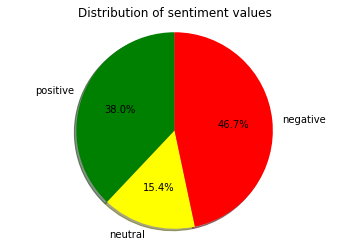

total positive: 1655
total neutral: 670
total negative: 2035


In [9]:
sentiment_count = round(sentiment_df["Polarity"].value_counts(), 2)

sentiments = [get_sentiment(polarity)
              for polarity in sentiment_df["Polarity"]]

sentiment_count_list = np.array([sentiments.count(
    "positive"), sentiments.count("neutral"), sentiments.count("negative")])

labels = ["positive", "neutral", "negative"]
colors = ["green", "yellow", "red"]
fig1, ax1 = plt.subplots()
ax1.pie(sentiment_count_list, labels=labels, shadow=True,
        autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Distribution of sentiment values")
plt.show()
print("total positive: {}".format(sentiments.count('positive')))
print("total neutral: {}".format(sentiments.count('neutral')))
print("total negative: {}".format(sentiments.count('negative')))

Using this nltk vader implementation for sentiment analysis, we get entirely diferent results. There are way less neutral tweets and more than half of the tweets now have a negative sentiment assigned to them

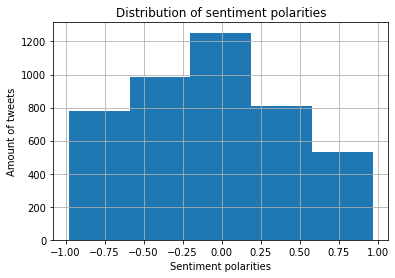

In [10]:
sentiment_df["Polarity"].hist(bins=5)
plt.title("Distribution of sentiment polarities")
plt.xlabel("Sentiment polarities")
plt.ylabel("Amount of tweets")
plt.show()

## Implementing machine learning algorithms

In [11]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ViMs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ViMs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Preprocessing data

In [12]:
labels = sentiment_df["Sentiment"].values
documents = []
stemmer = WordNetLemmatizer()

def filter_stopwords(word):
    if word in stopwords.words('english'):
        return False
    else:
        return True


# Extract tweet column from df
sentiment_df_text = sentiment_df["Tweet"]

for tweet in sentiment_df_text:
    document = tweet.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = filter(filter_stopwords, document)
    document = ' '.join(document)
    documents.append(document)
print(len(documents))

4360


### Vectorize words with TF-IDF + normalize features

In [13]:
# tfidf = term frequency, inverse document frequency ()
vectorizer = TfidfVectorizer(max_features=3000, min_df=5, max_df=0.80)
processed_features = vectorizer.fit_transform(documents)
#processed_features = normalize(processed_features)
processed_features = processed_features.toarray()

feature_names = vectorizer.get_feature_names()

chi2score = chi2(x_train_tfidf, y_train)

processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Divide into training and test sets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(processed_features,
                                                    labels, test_size=0.2,
                                                    random_state=1)

print(len(X_train))
print(len(X_test))

3488
872


### Implementing Multinomial Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
param_grid_mnb = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                  'fit_prior': [True, False]
                 }
grid_mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, cv=5, verbose=2, n_jobs=-1)
grid_mnb.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid_mnb.best_score_))
print("Best parameters: ", grid_mnb.best_params_)
print("Best estimator: ", grid_mnb.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.3s finished


Best cross-validation score: 0.65
Best parameters:  {'alpha': 0.1, 'fit_prior': False}
Best estimator:  MultinomialNB(alpha=0.1, class_prior=None, fit_prior=False)


* Best cross-validation score: 0.65
* Best parameters:  {'alpha': 0.1, 'fit_prior': False}
* Best estimator:  MultinomialNB(alpha=0.1, class_prior=None, fit_prior=False)

In [18]:
mnb = MultinomialNB(alpha=0.10, class_prior=None, fit_prior=False)
mnb.fit(X_train, y_train)
predictions_mnb = mnb.predict(X_test)
print(confusion_matrix(y_test, predictions_mnb))
print(classification_report(y_test, predictions_mnb))
print("The algorithm has reached an accuracy of: {:.2f}%".format(mnb.score(X_test, y_test)*100))

[[277  40  94]
 [ 25  76  24]
 [ 68  31 237]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       411
           1       0.52      0.61      0.56       125
           2       0.67      0.71      0.69       336

    accuracy                           0.68       872
   macro avg       0.64      0.66      0.65       872
weighted avg       0.68      0.68      0.68       872

The algorithm has reached an accuracy of: 67.66%


### Implementing Logistic regression & tuning hyperparameters

In [19]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

param_grid_lr ={'dual': [True, False],
                'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2 ],
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'fit_intercept': [True, False],
                'max_iter' : [100, 110, 120, 130, 140],
                'warm_start': [True, False]
              }
grid_lr = RandomizedSearchCV(LogisticRegression(), param_grid_lr,n_iter=1000,  verbose=2, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid_lr.best_score_))
print("Best parameters: ", grid_lr.best_params_)
print("Best estimator: ", grid_lr.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 11.4min


Best cross-validation score: 0.68
Best parameters:  {'warm_start': True, 'tol': 0.01, 'max_iter': 140, 'fit_intercept': False, 'dual': True, 'C': 10}
Best estimator:  LogisticRegression(C=10, class_weight=None, dual=True, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=140,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.01, verbose=0,
                   warm_start=True)


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 11.6min finished


* Best cross-validation score: 0.69
* Best parameters:  {'C': 10, 'dual': True, 'fit_intercept': True, 'max_iter': 110, 'tol': 0.01, 'warm_start': True}
* Best estimator:  LogisticRegression(C=10, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=110, multi_class='warn', n_jobs=None, penalty='l2', random_state=None, solver='warn', tol=0.01, verbose=0, warm_start=True)

In [20]:
lr = LogisticRegression(C=10, class_weight=None, dual=True, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=140,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.01, verbose=0,
                   warm_start=True)

lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

print(confusion_matrix(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))
print("The algorithm has reached an accuracy of: {:.2f}%".format(
    lr.score(X_test, y_test)*100))

[[314  24  73]
 [ 31  70  24]
 [ 86  19 231]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       411
           1       0.62      0.56      0.59       125
           2       0.70      0.69      0.70       336

    accuracy                           0.71       872
   macro avg       0.68      0.67      0.68       872
weighted avg       0.70      0.71      0.70       872

The algorithm has reached an accuracy of: 70.53%


### Implementing Support Vector Machine

In [22]:
from sklearn.svm import SVC
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [0.1, 1, 10, 100],
                  'degree': [0, 1, 2, 3, 4, 5, 6]
                 }

grid_svc = RandomizedSearchCV(SVC(), param_grid_svm, n_iter=150, cv=3, verbose=2, n_jobs=-1)
grid_svc.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Best parameters: ", grid_svc.best_params_)
print("Best estimator: ", grid_svc.best_estimator_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 88.9min


KeyboardInterrupt: 

* Best cross-validation score: 0.67
* Best parameters:  {'kernel': 'rbf', 'gamma': 1, 'degree': 0, 'C': 100}
* Best estimator:  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=0, gamma=1, kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

In [21]:

svm = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
svm_fit = svm.fit(X_train, y_train)
score_svm = svm.score(X_test, y_test)
predictions_svm = svm.predict(X_test)
print(confusion_matrix(y_test, predictions_svm))
print(classification_report(y_test, predictions_svm))
print("The algorithm has reached an accuracy of: {:.2f}%".format(score_svm*100))

NameError: name 'SVC' is not defined

### Implementing Random Forest & tuning hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

param_grid_rf = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

grid_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, n_iter=1000 , verbose=2, n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid_rf.best_score_))
print("Best parameters: ", grid_rf.best_params_)
print("Best estimator: ", grid_rf.best_estimator_)

In [ ]:
rf = grid_rf.best_estimator_

rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))
print("The algorithm has reached an accuracy of: {:.2f}%".format(
    accuracy_score(y_test, predictions_rf)*100))
print(rf.score(X_test, y_test))